In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set()
import matplotlib.font_manager as fm
font_location = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname = font_location).get_name()
plt.rc('font', family = font_name)

In [3]:
weather = pd.read_csv('C:/Users/seob6/Desktop/DT/maru/bigcon_weather.csv', encoding='euc-kr')
cvs = pd.read_csv('C:/Users/seob6/Desktop/DT/maru/korea_cvs.csv', encoding='euc-kr')
hnb = pd.read_csv('C:/Users/seob6/Desktop/DT/maru/korea_hnb.csv', encoding='euc-kr')

for i in [weather, cvs, hnb]:
    print(i.shape)

(70072, 11)
(2707786, 7)
(820274, 7)


In [3]:
weather.isnull().sum()

bigcon_weather.tm         10959
bigcon_weather.stn_id     10959
bigcon_weather.pvn_nm     10959
bigcon_weather.bor_nm     10959
bigcon_weather.max_ta     11246
bigcon_weather.max_ws     11294
bigcon_weather.min_ta     11246
bigcon_weather.avg_ta     11258
bigcon_weather.avg_rhm    26159
bigcon_weather.avg_wa     11244
bigcon_weather.sum_rn     11013
dtype: int64

In [4]:
cvs.isnull().sum()

korea_cvs.pvn_nm      0
korea_cvs.sale_dt     0
korea_cvs.gen_cd      0
korea_cvs.age_cd      0
korea_cvs.category    0
korea_cvs.adj_qty     0
korea_cvs.bor_nm      0
dtype: int64

In [5]:
weather.columns = ['day', 'id', 'do', 'si_gun', 'max_temp', 'max_wind',
                        'min_temp', 'mean_temp', 'mean_moisture', 'mean_wind', 'sum']

In [6]:
weather.head()

,day,id,do,si_gun,max_temp,max_wind,min_temp,mean_temp,mean_moisture,mean_wind,sum
0,20160101.0,98.0,경기도,동두천시,6.5,3.8,-6.4,-0.2,74.0,0.9,0.0
1,20160102.0,98.0,경기도,동두천시,10.1,3.2,1.9,5.4,70.0,1.3,0.0
2,20160103.0,98.0,경기도,동두천시,9.0,2.4,2.1,4.7,82.0,0.7,0.0
3,20160104.0,98.0,경기도,동두천시,8.0,5.3,-3.0,1.9,55.0,2.2,0.0
4,20160105.0,98.0,경기도,동두천시,3.1,5.6,-6.4,-2.8,36.0,1.8,0.0


In [7]:
cvs.columns = ['region', 'sales_date', 'gender', 'age', 'cate', 'quantity', 'gu']

In [8]:
cvs.head()

,region,sales_date,gender,age,cate,quantity,gu
0,서울특별시,20160101,F,00~19,라면,7,종로구
1,서울특별시,20160101,F,20~39,과자,655,종로구
2,서울특별시,20160101,F,20~39,라면,282,종로구
3,서울특별시,20160101,F,20~39,마스크,35,종로구
4,서울특별시,20160101,F,20~39,맥주,183,종로구


In [9]:
hnb.columns = ['region', 'gu', 'sales_date', 'gender', 'age', 'cate', 'quantity']

In [10]:
hnb.head()

,region,gu,sales_date,gender,age,cate,quantity
0,서울특별시,종로구,20160101,F,20~39,립컬러,73
1,서울특별시,종로구,20160101,F,20~39,립케어,219
2,서울특별시,종로구,20160101,F,20~39,마스크팩,657
3,서울특별시,종로구,20160101,F,20~39,바디로션,328
4,서울특별시,종로구,20160101,F,20~39,체중조절,109


In [11]:
cvs['cate'].value_counts()

과자       428685
라면       413521
아이스크림    318908
맥주       313128
생수       310041
탄산음료     303774
숙취해소제    184866
생리대      158116
스타킹      103876
마스크       65748
우산        55153
면도기       51970
Name: cate, dtype: int64

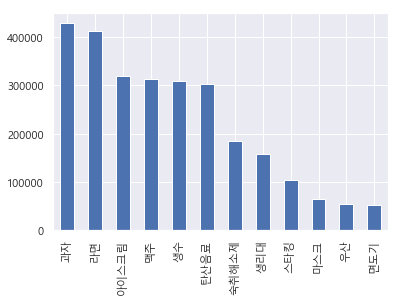

In [12]:
cvs.cate.value_counts().plot(kind='bar')

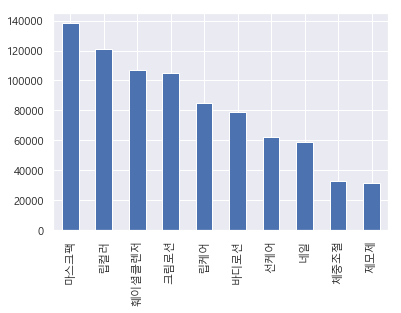

In [13]:
hnb.cate.value_counts().plot(kind='bar')

Text(0.5, 1.0, 'GS')

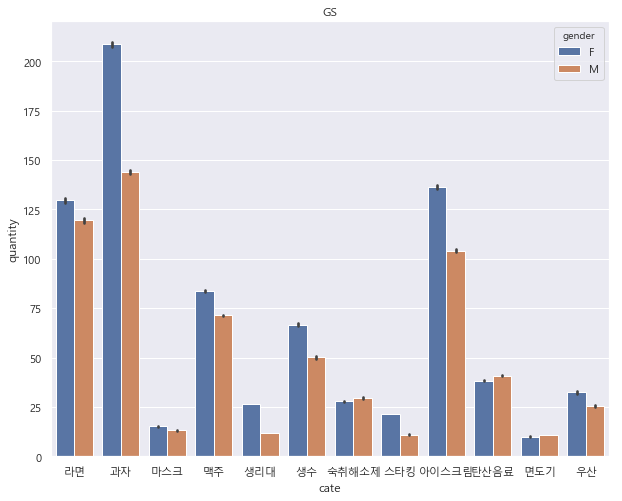

In [14]:
plt.figure(figsize=(10, 8))
sns.barplot(x='cate', y='quantity', hue='gender', data=cvs)
plt.title('GS')

Text(0.5, 1.0, '랄라블라')

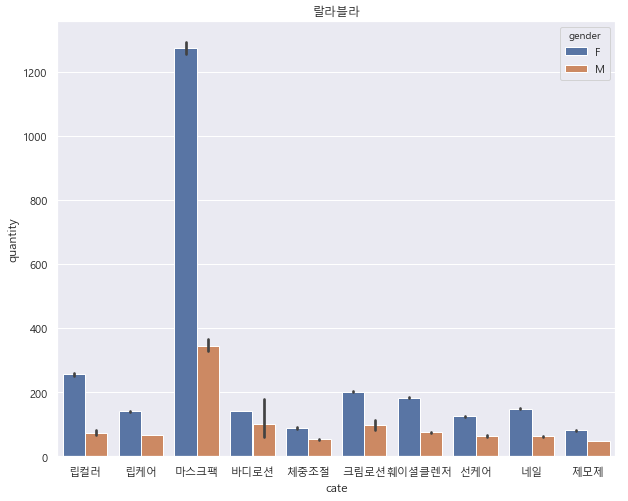

In [15]:
plt.figure(figsize=(10, 8))
sns.barplot(x='cate', y='quantity', hue='gender', data=hnb)
plt.title('랄라블라')

# 시기별 분석

In [16]:
import datetime as dt

In [17]:
display(cvs.head())
display(hnb.head())
display(weather.head())

,region,sales_date,gender,age,cate,quantity,gu
0,서울특별시,20160101,F,00~19,라면,7,종로구
1,서울특별시,20160101,F,20~39,과자,655,종로구
2,서울특별시,20160101,F,20~39,라면,282,종로구
3,서울특별시,20160101,F,20~39,마스크,35,종로구
4,서울특별시,20160101,F,20~39,맥주,183,종로구


,region,gu,sales_date,gender,age,cate,quantity
0,서울특별시,종로구,20160101,F,20~39,립컬러,73
1,서울특별시,종로구,20160101,F,20~39,립케어,219
2,서울특별시,종로구,20160101,F,20~39,마스크팩,657
3,서울특별시,종로구,20160101,F,20~39,바디로션,328
4,서울특별시,종로구,20160101,F,20~39,체중조절,109


,day,id,do,si_gun,max_temp,max_wind,min_temp,mean_temp,mean_moisture,mean_wind,sum
0,20160101.0,98.0,경기도,동두천시,6.5,3.8,-6.4,-0.2,74.0,0.9,0.0
1,20160102.0,98.0,경기도,동두천시,10.1,3.2,1.9,5.4,70.0,1.3,0.0
2,20160103.0,98.0,경기도,동두천시,9.0,2.4,2.1,4.7,82.0,0.7,0.0
3,20160104.0,98.0,경기도,동두천시,8.0,5.3,-3.0,1.9,55.0,2.2,0.0
4,20160105.0,98.0,경기도,동두천시,3.1,5.6,-6.4,-2.8,36.0,1.8,0.0


In [18]:
display(cvs.info())
display(hnb.info())
display(weather.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2707786 entries, 0 to 2707785
Data columns (total 7 columns):
region        object
sales_date    int64
gender        object
age           object
cate          object
quantity      int64
gu            object
dtypes: int64(2), object(5)
memory usage: 144.6+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820274 entries, 0 to 820273
Data columns (total 7 columns):
region        820274 non-null object
gu            820274 non-null object
sales_date    820274 non-null int64
gender        820274 non-null object
age           820274 non-null object
cate          820274 non-null object
quantity      820274 non-null int64
dtypes: int64(2), object(5)
memory usage: 43.8+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70072 entries, 0 to 70071
Data columns (total 11 columns):
day              59113 non-null float64
id               59113 non-null float64
do               59113 non-null object
si_gun           59113 non-null object
max_temp         58826 non-null float64
max_wind         58778 non-null float64
min_temp         58826 non-null float64
mean_temp        58814 non-null float64
mean_moisture    43913 non-null float64
mean_wind        58828 non-null float64
sum              59059 non-null float64
dtypes: float64(9), object(2)
memory usage: 5.9+ MB


None

## cvs eda

In [19]:
cvs.head(2)

,region,sales_date,gender,age,cate,quantity,gu
0,서울특별시,20160101,F,00~19,라면,7,종로구
1,서울특별시,20160101,F,20~39,과자,655,종로구


Text(0.5, 1.0, 'quantity_Gender')

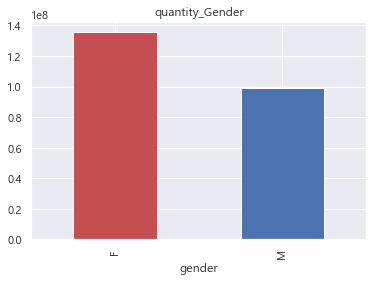

In [20]:
cvs['quantity'].groupby(cvs['gender']).sum().plot.bar(color=['r','b'])
plt.title('quantity_Gender')

In [21]:
cvs_cate_gen = cvs['quantity'].groupby([cvs['cate'], cvs['gender']]).sum().to_frame().style.background_gradient('summer_r')
cvs_cate_gen

In [ ]:
pd.pivot_table(data=cvs, index='cate', values='quantity', columns='gender', aggfunc=sum)

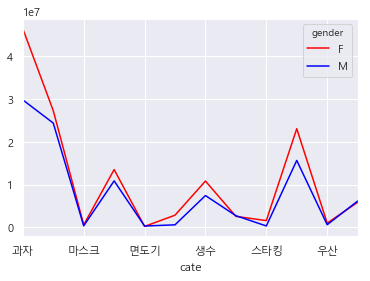

In [23]:
pd.pivot_table(data=cvs, index='cate', values='quantity', columns='gender', aggfunc=sum).plot(color=['red','blue'])
# plt.xticks(['과자','라면','마스크','맥주','면도기','생리대','생수','숙취해소제','스타킹','아이스크림','우산','탄산'])


In [24]:
cvs.tail(2)

,region,sales_date,gender,age,cate,quantity,gu
2707784,경기도,20181231,F,60~99,생리대,7,여주시이천시
2707785,경기도,20181231,M,20~39,아이스크림,7,여주시이천시


## 날짜 월별로

In [ ]:
sns.barplot(data=cvs_1, x='sales_date', y='quantity')

In [ ]:
cvs_quantity_2016 = cvs.loc[(cvs['sales_date'] >= 20160101) & (cvs['sales_date'] < 20170101), ['sales_date' ,'quantity']]
sns.barplot(data=cvs_quantity_2016, x='sales_date', y='quantity')

# 2016년 판매량 추이

In [ ]:
def func16():
    li_2016 = []
    result1, result2, result3, result4, result5, result6, result7, result8, result9, result10, result11, result12 = 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
    for i in range(20160101, 20160131):
        cvs_2016_1 = cvs_quantity_2016['quantity'].groupby(cvs_quantity_2016['sales_date']==i).sum()[1]
        result1 = result1+cvs_2016_1
    li_2016.append(result1)
    for i in range(20160201, 20160229):
        cvs_2016_2 = cvs_quantity_2016['quantity'].groupby(cvs_quantity_2016['sales_date']==i).sum()[1]
        result2 = result2+cvs_2016_2
    li_2016.append(result2)
    for i in range(20160301, 20160331):
        cvs_2016_3 = cvs_quantity_2016['quantity'].groupby(cvs_quantity_2016['sales_date']==i).sum()[1]
        result3 = result3+cvs_2016_3
    li_2016.append(result3)
    for i in range(20160401, 20160430):
        cvs_2016_4 = cvs_quantity_2016['quantity'].groupby(cvs_quantity_2016['sales_date']==i).sum()[1]
        result4 = result4+cvs_2016_4
    li_2016.append(result4)    
    for i in range(20160501, 20160531):
        cvs_2016_5 = cvs_quantity_2016['quantity'].groupby(cvs_quantity_2016['sales_date']==i).sum()[1]
        result5 = result5+cvs_2016_5
    li_2016.append(result5)
    for i in range(20160601, 20160630):
        cvs_2016_6 = cvs_quantity_2016['quantity'].groupby(cvs_quantity_2016['sales_date']==i).sum()[1]
        result6 = result6+cvs_2016_6
    li_2016.append(result6)
    for i in range(20160701, 20160731):
        cvs_2016_7 = cvs_quantity_2016['quantity'].groupby(cvs_quantity_2016['sales_date']==i).sum()[1]
        result7 = result7+cvs_2016_7
    li_2016.append(result7)
    for i in range(20160801, 20160831):
        cvs_2016_8 = cvs_quantity_2016['quantity'].groupby(cvs_quantity_2016['sales_date']==i).sum()[1]
        result8 = result8+cvs_2016_8
    li_2016.append(result8)
    for i in range(20160901, 20160930):
        cvs_2016_9 = cvs_quantity_2016['quantity'].groupby(cvs_quantity_2016['sales_date']==i).sum()[1]
        result9 = result9+cvs_2016_9
    li_2016.append(result9)
    for i in range(20161001, 20161031):
        cvs_2016_10 = cvs_quantity_2016['quantity'].groupby(cvs_quantity_2016['sales_date']==i).sum()[1]
        result10 = result10+cvs_2016_10
    li_2016.append(result10)
    for i in range(20161101, 20161130):
        cvs_2016_11 = cvs_quantity_2016['quantity'].groupby(cvs_quantity_2016['sales_date']==i).sum()[1]
        result11 = result11+cvs_2016_11
    li_2016.append(result11)
    for i in range(20161201, 20161231):
        cvs_2016_12 = cvs_quantity_2016['quantity'].groupby(cvs_quantity_2016['sales_date']==i).sum()[1]
        result12 = result12+cvs_2016_12
    li_2016.append(result12)
        
    return li_2016

In [ ]:
func16()
y_2016 = func16()
x_2016 = [1, 2, 3, 4, 5, 6,7, 8, 9, 10, 11, 12]
sns.barplot(data=cvs_quantity_2016, x=x_2016, y=y_2016)
plt.title('2016년 월별 판매량')

# 2017년 판매량 추이

In [ ]:
cvs_quantity_2017 = cvs.loc[(cvs['sales_date'] >= 20170101) & (cvs['sales_date'] < 20180101), ['sales_date' ,'quantity']]
def func17():
    li_2017 = []
    result1, result2, result3, result4, result5, result6, result7, result8, result9, result10, result11, result12 = 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
    for i in range(20170101, 20170131):
        cvs_2017_1 = cvs_quantity_2017['quantity'].groupby(cvs_quantity_2017['sales_date']==i).sum()[1]
        result1 = result1+cvs_2017_1
    li_2017.append(result1)
    for i in range(20170201, 20170228):
        cvs_2017_2 = cvs_quantity_2017['quantity'].groupby(cvs_quantity_2017['sales_date']==i).sum()[1]
        result2 = result2+cvs_2017_2
    li_2017.append(result2)
    for i in range(20170301, 20170331):
        cvs_2017_3 = cvs_quantity_2017['quantity'].groupby(cvs_quantity_2017['sales_date']==i).sum()[1]
        result3 = result3+cvs_2017_3
    li_2017.append(result3)
    for i in range(20170401, 20170430):
        cvs_2017_4 = cvs_quantity_2017['quantity'].groupby(cvs_quantity_2017['sales_date']==i).sum()[1]
        result4 = result4+cvs_2017_4
    li_2017.append(result4)    
    for i in range(20170501, 20170531):
        cvs_2017_5 = cvs_quantity_2017['quantity'].groupby(cvs_quantity_2017['sales_date']==i).sum()[1]
        result5 = result5+cvs_2017_5
    li_2017.append(result5)
    for i in range(20170601, 20170630):
        cvs_2017_6 = cvs_quantity_2017['quantity'].groupby(cvs_quantity_2017['sales_date']==i).sum()[1]
        result6 = result6+cvs_2017_6
    li_2017.append(result6)
    for i in range(20170701, 20170731):
        cvs_2017_7 = cvs_quantity_2017['quantity'].groupby(cvs_quantity_2017['sales_date']==i).sum()[1]
        result7 = result7+cvs_2017_7
    li_2017.append(result7)
    for i in range(20170801, 20170831):
        cvs_2017_8 = cvs_quantity_2017['quantity'].groupby(cvs_quantity_2017['sales_date']==i).sum()[1]
        result8 = result8+cvs_2017_8
    li_2017.append(result8)
    for i in range(20170901, 20170930):
        cvs_2017_9 = cvs_quantity_2017['quantity'].groupby(cvs_quantity_2017['sales_date']==i).sum()[1]
        result9 = result9+cvs_2017_9
    li_2017.append(result9)
    for i in range(20171001, 20171031):
        cvs_2017_10 = cvs_quantity_2017['quantity'].groupby(cvs_quantity_2017['sales_date']==i).sum()[1]
        result10 = result10+cvs_2017_10
    li_2017.append(result10)
    for i in range(20171101, 20171130):
        cvs_2017_11 = cvs_quantity_2017['quantity'].groupby(cvs_quantity_2017['sales_date']==i).sum()[1]
        result11 = result11+cvs_2017_11
    li_2017.append(result11)
    for i in range(20171201, 20171231):
        cvs_2017_12 = cvs_quantity_2017['quantity'].groupby(cvs_quantity_2017['sales_date']==i).sum()[1]
        result12 = result12+cvs_2017_12
    li_2017.append(result12)
        
    return li_2017

In [ ]:
func17()
y_2017 = func17()
x_2017 = [1, 2, 3, 4, 5, 6,7, 8, 9, 10, 11, 12]
sns.barplot(data=cvs_quantity_2017, x=x_2017, y=y_2017)
plt.title('2017년 월별 판매량')

# 2018년 월별 판매량

In [ ]:
cvs_quantity_2018 = cvs.loc[(cvs['sales_date'] >= 20180101) & (cvs['sales_date'] < 20190101), ['sales_date' ,'quantity']]
def func18():
    li_2018 = []
    result1, result2, result3, result4, result5, result6, result7, result8, result9, result10, result11, result12 = 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
    for i in range(20180101, 20180131):
        cvs_2018_1 = cvs_quantity_2018['quantity'].groupby(cvs_quantity_2018['sales_date']==i).sum()[1]
        result1 = result1+cvs_2018_1
    li_2018.append(result1)
    for i in range(20180201, 20180228):
        cvs_2018_2 = cvs_quantity_2018['quantity'].groupby(cvs_quantity_2018['sales_date']==i).sum()[1]
        result2 = result2+cvs_2018_2
    li_2018.append(result2)
    for i in range(20180301, 20180331):
        cvs_2018_3 = cvs_quantity_2018['quantity'].groupby(cvs_quantity_2018['sales_date']==i).sum()[1]
        result3 = result3+cvs_2018_3
    li_2018.append(result3)
    for i in range(20180401, 20180430):
        cvs_2018_4 = cvs_quantity_2018['quantity'].groupby(cvs_quantity_2018['sales_date']==i).sum()[1]
        result4 = result4+cvs_2018_4
    li_2018.append(result4)    
    for i in range(20180501, 20180531):
        cvs_2018_5 = cvs_quantity_2018['quantity'].groupby(cvs_quantity_2018['sales_date']==i).sum()[1]
        result5 = result5+cvs_2018_5
    li_2018.append(result5)
    for i in range(20180601, 20180630):
        cvs_2018_6 = cvs_quantity_2018['quantity'].groupby(cvs_quantity_2018['sales_date']==i).sum()[1]
        result6 = result6+cvs_2018_6
    li_2018.append(result6)
    for i in range(20180701, 20180731):
        cvs_2018_7 = cvs_quantity_2018['quantity'].groupby(cvs_quantity_2018['sales_date']==i).sum()[1]
        result7 = result7+cvs_2018_7
    li_2018.append(result7)
    for i in range(20180801, 20180831):
        cvs_2018_8 = cvs_quantity_2018['quantity'].groupby(cvs_quantity_2018['sales_date']==i).sum()[1]
        result8 = result8+cvs_2018_8
    li_2018.append(result8)
    for i in range(20180901, 20180930):
        cvs_2018_9 = cvs_quantity_2018['quantity'].groupby(cvs_quantity_2018['sales_date']==i).sum()[1]
        result9 = result9+cvs_2018_9
    li_2018.append(result9)
    for i in range(20181001, 20181031):
        cvs_2018_10 = cvs_quantity_2018['quantity'].groupby(cvs_quantity_2018['sales_date']==i).sum()[1]
        result10 = result10+cvs_2018_10
    li_2018.append(result10)
    for i in range(20181101, 20181130):
        cvs_2018_11 = cvs_quantity_2018['quantity'].groupby(cvs_quantity_2018['sales_date']==i).sum()[1]
        result11 = result11+cvs_2018_11
    li_2018.append(result11)
    for i in range(20181201, 20181231):
        cvs_2018_12 = cvs_quantity_2018['quantity'].groupby(cvs_quantity_2018['sales_date']==i).sum()[1]
        result12 = result12+cvs_2018_12
    li_2018.append(result12)
        
    return li_2018

In [ ]:
func18()
y_2018 = func18()
x_2018 = [1, 2, 3, 4, 5, 6,7, 8, 9, 10, 11, 12]
sns.barplot(data=cvs_quantity_2018, x=x_2018, y=y_2018)
plt.title('2018년 월별 판매량')

# 2016~2018년 월별 판매량

In [ ]:
plt.figure(figsize=(10, 6))
plt.subplot(221)
plt.title('2016년 월별 판매량')
sns.barplot(data=cvs_quantity_2016, x=x_2016, y=y_2016)

plt.figure(figsize=(10, 6))
plt.subplot(222)
plt.title('2017년 월별 판매량')
sns.barplot(data=cvs_quantity_2017, x=x_2017, y=y_2017)

plt.figure(figsize=(10, 6))
plt.subplot(223)
plt.title('2018년 월별 판매량')
sns.barplot(data=cvs_quantity_2018, x=x_2018, y=y_2018)

해마다 7, 8월에 GS 편의점 구매량이 많았음

## 여름에 뭘 많이 구매할까?

### 2016년 7~8월

In [ ]:
cvs.head(2)

In [ ]:
cvs_summer_16 = cvs[(cvs['sales_date']>=20160701)&(cvs['sales_date']<20160901)]
cvs_summer_16 = cvs_summer_16[['sales_date', 'cate', 'quantity', 'gender', 'age']]
print(cvs_summer_16.shape)
cvs_summer_16.head()

In [ ]:
cvs_summer_16.tail()

In [ ]:
cvs_summer_16=cvs_summer_16.reset_index(drop=True)
print(cvs_summer_16.shape)
cvs_summer_16.head(3)

In [ ]:
cvs_summer_16.cate.value_counts().sort_values(ascending=False)

In [ ]:
cvs_summer_16_cate_sum = []
i = 0
while i < 1:
    i = i + 1
    cvs_summer_16_cate_sum.append(cvs_summer_16.loc[cvs_summer_16['cate']=='과자', 'quantity'].sum())
    cvs_summer_16_cate_sum.append(cvs_summer_16.loc[cvs_summer_16['cate']=='라면', 'quantity'].sum())
    cvs_summer_16_cate_sum.append(cvs_summer_16.loc[cvs_summer_16['cate']=='아이스크림', 'quantity'].sum())
    cvs_summer_16_cate_sum.append(cvs_summer_16.loc[cvs_summer_16['cate']=='생수', 'quantity'].sum())
    cvs_summer_16_cate_sum.append(cvs_summer_16.loc[cvs_summer_16['cate']=='맥주', 'quantity'].sum())
    cvs_summer_16_cate_sum.append(cvs_summer_16.loc[cvs_summer_16['cate']=='탄산음료', 'quantity'].sum())
    cvs_summer_16_cate_sum.append(cvs_summer_16.loc[cvs_summer_16['cate']=='숙취해소제', 'quantity'].sum())
    cvs_summer_16_cate_sum.append(cvs_summer_16.loc[cvs_summer_16['cate']=='생리대', 'quantity'].sum())
    cvs_summer_16_cate_sum.append(cvs_summer_16.loc[cvs_summer_16['cate']=='우산', 'quantity'].sum())
    cvs_summer_16_cate_sum.append(cvs_summer_16.loc[cvs_summer_16['cate']=='스타킹', 'quantity'].sum())
    cvs_summer_16_cate_sum.append(cvs_summer_16.loc[cvs_summer_16['cate']=='면도기', 'quantity'].sum())
    cvs_summer_16_cate_sum.append(cvs_summer_16.loc[cvs_summer_16['cate']=='마스크', 'quantity'].sum())
cvs_summer_16_cate_sum

In [ ]:
summer_16_x = cvs_summer_16.cate.value_counts().index
plt.figure(figsize=(10,8))
plt.title('2016년 7~8월 품목별 판매량')
sns.barplot(data=cvs_summer_16, x=summer_16_x, y=cvs_summer_16_cate_sum)

### 2017년 7~8월

In [ ]:
cvs_summer_17 = cvs[(cvs['sales_date']>=20170701)&(cvs['sales_date']<20170901)]
cvs_summer_17 = cvs_summer_17[['sales_date', 'cate', 'quantity', 'gender', 'age']]
cvs_summer_17=cvs_summer_17.reset_index(drop=True)

cvs_summer_17_cate_sum = []
i = 0
while i < 1:
    i = i + 1
    cvs_summer_17_cate_sum.append(cvs_summer_17.loc[cvs_summer_17['cate']=='과자', 'quantity'].sum())
    cvs_summer_17_cate_sum.append(cvs_summer_17.loc[cvs_summer_17['cate']=='라면', 'quantity'].sum())
    cvs_summer_17_cate_sum.append(cvs_summer_17.loc[cvs_summer_17['cate']=='아이스크림', 'quantity'].sum())
    cvs_summer_17_cate_sum.append(cvs_summer_17.loc[cvs_summer_17['cate']=='생수', 'quantity'].sum())
    cvs_summer_17_cate_sum.append(cvs_summer_17.loc[cvs_summer_17['cate']=='맥주', 'quantity'].sum())
    cvs_summer_17_cate_sum.append(cvs_summer_17.loc[cvs_summer_17['cate']=='탄산음료', 'quantity'].sum())
    cvs_summer_17_cate_sum.append(cvs_summer_17.loc[cvs_summer_17['cate']=='숙취해소제', 'quantity'].sum())
    cvs_summer_17_cate_sum.append(cvs_summer_17.loc[cvs_summer_17['cate']=='생리대', 'quantity'].sum())
    cvs_summer_17_cate_sum.append(cvs_summer_17.loc[cvs_summer_17['cate']=='우산', 'quantity'].sum())
    cvs_summer_17_cate_sum.append(cvs_summer_17.loc[cvs_summer_17['cate']=='스타킹', 'quantity'].sum())
    cvs_summer_17_cate_sum.append(cvs_summer_17.loc[cvs_summer_17['cate']=='면도기', 'quantity'].sum())
    cvs_summer_17_cate_sum.append(cvs_summer_17.loc[cvs_summer_17['cate']=='마스크', 'quantity'].sum())
cvs_summer_17_cate_sum

In [ ]:
summer_17_x = ['과자','라면','아이스크림','생수','맥주','탄산음료','숙취해소제','생리대','우산','스타킹','면도기','마스크']
plt.figure(figsize=(10,8))
plt.title('2017년 7~8월 품목별 판매량')
sns.barplot(data=cvs_summer_17, x=summer_17_x, y=cvs_summer_17_cate_sum)

### 2018년 7~8월

In [ ]:
cvs_summer_18 = cvs[(cvs['sales_date']>=20180701)&(cvs['sales_date']<20180901)]
cvs_summer_18 = cvs_summer_18[['sales_date', 'cate', 'quantity', 'gender', 'age']]
cvs_summer_18=cvs_summer_18.reset_index(drop=True)

cvs_summer_18_cate_sum = []
i = 0
while i < 1:
    i = i + 1
    cvs_summer_18_cate_sum.append(cvs_summer_18.loc[cvs_summer_18['cate']=='과자', 'quantity'].sum())
    cvs_summer_18_cate_sum.append(cvs_summer_18.loc[cvs_summer_18['cate']=='라면', 'quantity'].sum())
    cvs_summer_18_cate_sum.append(cvs_summer_18.loc[cvs_summer_18['cate']=='아이스크림', 'quantity'].sum())
    cvs_summer_18_cate_sum.append(cvs_summer_18.loc[cvs_summer_18['cate']=='생수', 'quantity'].sum())
    cvs_summer_18_cate_sum.append(cvs_summer_18.loc[cvs_summer_18['cate']=='맥주', 'quantity'].sum())
    cvs_summer_18_cate_sum.append(cvs_summer_18.loc[cvs_summer_18['cate']=='탄산음료', 'quantity'].sum())
    cvs_summer_18_cate_sum.append(cvs_summer_18.loc[cvs_summer_18['cate']=='숙취해소제', 'quantity'].sum())
    cvs_summer_18_cate_sum.append(cvs_summer_18.loc[cvs_summer_18['cate']=='생리대', 'quantity'].sum())
    cvs_summer_18_cate_sum.append(cvs_summer_18.loc[cvs_summer_18['cate']=='우산', 'quantity'].sum())
    cvs_summer_18_cate_sum.append(cvs_summer_18.loc[cvs_summer_18['cate']=='스타킹', 'quantity'].sum())
    cvs_summer_18_cate_sum.append(cvs_summer_18.loc[cvs_summer_18['cate']=='면도기', 'quantity'].sum())
    cvs_summer_18_cate_sum.append(cvs_summer_18.loc[cvs_summer_18['cate']=='마스크', 'quantity'].sum())
cvs_summer_18_cate_sum

In [ ]:
summer_18_x = ['과자','라면','아이스크림','생수','맥주','탄산음료','숙취해소제','생리대','우산','스타킹','면도기','마스크']
plt.figure(figsize=(10,8))
plt.title('2018년 7~8월 품목별 판매량')
sns.barplot(data=cvs_summer_18, x=summer_18_x, y=cvs_summer_18_cate_sum)

In [ ]:
plt.figure(figsize=(24, 13))
plt.subplot(221)
plt.title('2016년 7~8월 품목별 판매량')
sns.barplot(data=cvs_summer_16, x=summer_16_x, y=cvs_summer_16_cate_sum)

plt.figure(figsize=(24, 13))
plt.subplot(221)
plt.title('2017년 7~8월 품목별 판매량')
sns.barplot(data=cvs_summer_17, x=summer_17_x, y=cvs_summer_17_cate_sum)

plt.figure(figsize=(24, 13))
plt.subplot(221)
plt.title('2018년 7~8월 품목별 판매량')
sns.barplot(data=cvs_summer_18, x=summer_18_x, y=cvs_summer_18_cate_sum)

아이스크림, 과자, 라면, 맥주가 여름에 가장 많이 팔린 상위 4개 품목

# 여름, 남녀 구매 품목

In [ ]:
cvs_summer_16_cate_sum

In [ ]:
cvs_summer_16.head()

In [ ]:
f, ax = plt.subplots(3, 1, figsize=(20, 20))
pd.pivot_table(cvs_summer_16, 'quantity', 'cate', 'gender', aggfunc='sum').plot(kind='bar', color=['red','blue'], ax=ax[0])
pd.pivot_table(cvs_summer_17, 'quantity', 'cate', 'gender', aggfunc='sum').plot(kind='bar', color=['red','blue'], ax=ax[1])
pd.pivot_table(cvs_summer_18, 'quantity', 'cate', 'gender', aggfunc='sum').plot(kind='bar', color=['red','blue'], ax=ax[2])
# plt.xticks(['과자','라면','마스크','맥주','면도기','생리대','생수','숙취해소제','스타킹','아이스크림','우산','탄산'])

plt.tight_layout()

# hnb eda

In [ ]:
cvs_summer_16['cate'].groupby(cvs_summer_16['gender']).sum()

In [ ]:
hnb.head()

In [ ]:
hnb_cate = pd.pivot_table(data=hnb, values='quantity', index='cate', aggfunc='sum').sort_values(by='quantity', ascending=False)
hnb_cate.style.background_gradient('summer_r')

In [ ]:
pd.pivot_table(hnb, 'quantity', 'cate', 'gender', aggfunc='sum', margins=True)

In [ ]:
# def cate_ratio(x):
#     return x/sum(x)
# pd.crosstab(index=hnb['cate'], columns=hnb['gender'], 
#             values=hnb['quantity'], aggfunc='sum', margins=True).agg(cate_ratio)
# pd.crosstab(index=hnb['cate'], columns=hnb['gender'], 
#             values=hnb['quantity'], aggfunc='sum', margins=True).apply(lambda x: x/sum(x))

In [ ]:
pd.crosstab(index=hnb['cate'], columns=hnb['gender'], values=hnb['quantity'], 
            aggfunc='sum').plot.barh(figsize=(17,10), color=['red','blue'])

전 품목에서 여성 구매율 > 남성 구매율

### 16년 7월~9월  
### 17년 7월~9월
### 18년 7월~9월

In [ ]:
# 16년 7~9월
hnb.quantity.groupby([(hnb['sales_date']>=20160701)&(hnb['sales_date']<20160901)==True, 
                      hnb['cate']]).sum().unstack()

In [ ]:
hnb.loc[(hnb['sales_date']>=20160701)&(hnb['sales_date']<20160901), 'quantity'].sum()

In [ ]:
hnb_2016_summer = pd.DataFrame(hnb.quantity.groupby([(hnb['sales_date']>=20160701)&(hnb['sales_date']<20160901)==True, 
                      hnb['cate']]).sum()[11:]).T
hnb_2016_summer

In [ ]:
ax = hnb_2016_summer.plot(kind='bar', figsize=(20,10))
ax.set_title('2016년 7~8월 품목별 판매량')
ax.set_xlabel(['립컬러','립케어','마스크팩','바디로션','선케어','제모제','체중조절','크림로션','훼이셜클렌저'])
ax.legend(loc='best', prop={'size': 15})

In [ ]:
hnb_2017_summer = pd.DataFrame(hnb.quantity.groupby([(hnb['sales_date']>=20170701)&(hnb['sales_date']<20170901)==True, 
                      hnb['cate']]).sum()[11:]).T
ax = hnb_2017_summer.plot(kind='bar', figsize=(20,10))
ax.set_title('2017년 7~8월 품목별 판매량')
ax.set_xlabel(['립컬러','립케어','마스크팩','바디로션','선케어','제모제','체중조절','크림로션','훼이셜클렌저'])
ax.legend(loc='best', prop={'size': 15})

In [ ]:
hnb_2018_summer = pd.DataFrame(hnb.quantity.groupby([(hnb['sales_date']>=20180701)&(hnb['sales_date']<20180901)==True, 
                      hnb['cate']]).sum()[11:]).T
ax = hnb_2018_summer.plot(kind='bar', figsize=(20,10))
ax.set_title('2018년 7~8월 품목별 판매량')
ax.set_xlabel(['립컬러','립케어','마스크팩','바디로션','선케어','제모제','체중조절','크림로션','훼이셜클렌저'])
ax.legend(loc='best', prop={'size': 15})

In [130]:
hnb.head()

,region,gu,sales_date,gender,age,cate,quantity
0,서울특별시,종로구,20160101,F,20~39,립컬러,73
1,서울특별시,종로구,20160101,F,20~39,립케어,219
2,서울특별시,종로구,20160101,F,20~39,마스크팩,657
3,서울특별시,종로구,20160101,F,20~39,바디로션,328
4,서울특별시,종로구,20160101,F,20~39,체중조절,109


In [132]:
hnb_female = 

1768305

In [ ]:
hnb_hair = cvs.loc[(cvs.region=='서울특별시')&(cvs.cate=='맥주'), ['region', 'cate', 'quantity', 'gu']]

beer_seoul = cvs_beer.groupby([cvs_beer.gu], as_index=False).sum()
beer_seoul.sort_values(by='quantity', ascending=False)

geo_path = 'C:/Users/seob6/Desktop/DT/maru/skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))
map = folium.Map(location=[37.5502, 126.982], zoom_start=11)

map.choropleth(geo_data=geo_str, data=beer_seoul, 
               columns=['gu', 'quantity'], 
               fill_color='PuRd', key_on='feature.id')
map

# 라면

In [17]:
import folium
import json

In [18]:
cvs.head()

,region,sales_date,gender,age,cate,quantity,gu
0,서울특별시,20160101,F,00~19,라면,7,종로구
1,서울특별시,20160101,F,20~39,과자,655,종로구
2,서울특별시,20160101,F,20~39,라면,282,종로구
3,서울특별시,20160101,F,20~39,마스크,35,종로구
4,서울특별시,20160101,F,20~39,맥주,183,종로구


In [19]:
cvs_ramen = cvs.loc[(cvs.region=='서울특별시')&(cvs.cate=='라면'), ['region', 'cate', 'quantity', 'gu']]
cvs_ramen.head()

,region,cate,quantity,gu
0,서울특별시,라면,7,종로구
2,서울특별시,라면,282,종로구
12,서울특별시,라면,176,종로구
23,서울특별시,라면,14,종로구
25,서울특별시,라면,254,종로구


In [20]:
cvs_ramen.groupby([cvs_ramen.gu, cvs_ramen.region, cvs_ramen.cate], as_index=False).sum().head()

,gu,region,cate,quantity
0,강남구,서울특별시,라면,2510597
1,강동구,서울특별시,라면,566402
2,강북구,서울특별시,라면,366762
3,강서구,서울특별시,라면,763720
4,관악구,서울특별시,라면,2081538


### ★

In [122]:
ramen_seoul = cvs_ramen.groupby([cvs_ramen.gu], as_index=False).sum()
ramen_seoul.sort_values(by='quantity', ascending=False)

,gu,quantity
0,강남구,2510597
4,관악구,2081538
14,서초구,1494205
12,마포구,1441917
13,서대문구,1424758
11,동작구,1317396
19,영등포구,1315079
22,종로구,1182623
23,중구,1072244
17,송파구,984283


In [25]:
geo_path = 'C:/Users/seob6/Desktop/DT/maru/skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

In [26]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11)

In [27]:
map.choropleth(geo_data=geo_str, data=ramen_seoul, 
               columns=['gu', 'quantity'], 
               fill_color='PuRd', key_on='feature.id')
map

# 날씨

In [71]:
weather = pd.read_csv('C:/Users/seob6/Desktop/DT/maru/bigcon_weather.csv', encoding='euc-kr')
weather.columns = ['day', 'id', 'do', 'si_gun', 'max_temp', 'max_wind',
                        'min_temp', 'mean_temp', 'mean_moisture', 'mean_wind', 'sum']

In [72]:
display(weather.head())
display(weather.shape)

,day,id,do,si_gun,max_temp,max_wind,min_temp,mean_temp,mean_moisture,mean_wind,sum
0,20160101.0,98.0,경기도,동두천시,6.5,3.8,-6.4,-0.2,74.0,0.9,0.0
1,20160102.0,98.0,경기도,동두천시,10.1,3.2,1.9,5.4,70.0,1.3,0.0
2,20160103.0,98.0,경기도,동두천시,9.0,2.4,2.1,4.7,82.0,0.7,0.0
3,20160104.0,98.0,경기도,동두천시,8.0,5.3,-3.0,1.9,55.0,2.2,0.0
4,20160105.0,98.0,경기도,동두천시,3.1,5.6,-6.4,-2.8,36.0,1.8,0.0


(70072, 11)

In [73]:
wea = weather.copy()
# wea.dropna(inplace=True)

In [74]:
wea.head()

,day,id,do,si_gun,max_temp,max_wind,min_temp,mean_temp,mean_moisture,mean_wind,sum
0,20160101.0,98.0,경기도,동두천시,6.5,3.8,-6.4,-0.2,74.0,0.9,0.0
1,20160102.0,98.0,경기도,동두천시,10.1,3.2,1.9,5.4,70.0,1.3,0.0
2,20160103.0,98.0,경기도,동두천시,9.0,2.4,2.1,4.7,82.0,0.7,0.0
3,20160104.0,98.0,경기도,동두천시,8.0,5.3,-3.0,1.9,55.0,2.2,0.0
4,20160105.0,98.0,경기도,동두천시,3.1,5.6,-6.4,-2.8,36.0,1.8,0.0


In [75]:
display(wea.shape)
display(wea.isnull().sum())

(70072, 11)

day              10959
id               10959
do               10959
si_gun           10959
max_temp         11246
max_wind         11294
min_temp         11246
mean_temp        11258
mean_moisture    26159
mean_wind        11244
sum              11013
dtype: int64

In [76]:
wea_seoul = wea[wea['do'] == '서울특별시']
print(wea_seoul.shape)
wea_seoul.head(2)

(27395, 11)


,day,id,do,si_gun,max_temp,max_wind,min_temp,mean_temp,mean_moisture,mean_wind,sum
2192,20160101.0,108.0,서울특별시,종로구,4.0,3.5,-3.3,1.2,73.0,1.6,0.0
2193,20160102.0,108.0,서울특별시,종로구,9.5,4.5,1.0,5.7,77.0,2.0,0.0


In [77]:
wea_seoul[wea_seoul.si_gun=='송파구']

,day,id,do,si_gun,max_temp,max_wind,min_temp,mean_temp,mean_moisture,mean_wind,sum
10959,20160101.0,403.0,서울특별시,송파구,5.7,2.3,-1.9,2.5,NaN,0.9,0.0
10960,20160102.0,403.0,서울특별시,송파구,10.8,3.3,3.6,7.5,NaN,1.5,0.0
10961,20160103.0,403.0,서울특별시,송파구,11.1,2.0,5.7,7.9,NaN,1.0,0.0
10962,20160104.0,403.0,서울특별시,송파구,7.3,4.3,-0.6,3.7,NaN,2.3,0.0
10963,20160105.0,403.0,서울특별시,송파구,2.6,3.4,-2.3,-0.6,NaN,1.8,0.0
10964,20160106.0,403.0,서울특별시,송파구,3.1,3.6,-2.4,0.1,NaN,1.6,0.0
10965,20160107.0,403.0,서울특별시,송파구,2.8,3.7,-3.1,-1.1,NaN,2.2,0.0
10966,20160108.0,403.0,서울특별시,송파구,1.8,4.4,-4.7,-0.9,NaN,1.9,0.0
10967,20160109.0,403.0,서울특별시,송파구,3.6,3.5,-2.8,0.3,NaN,1.6,0.0
10968,20160110.0,403.0,서울특별시,송파구,4.7,4.0,0.0,2.1,NaN,2.0,0.0


### 연도별 동네별 평균 온도

In [78]:
wea_seoul_16 = wea_seoul[(wea_seoul['day']>=20160101.0) & (wea_seoul['day']<20170101.0)]
print(wea_seoul_16.shape)
wea_seoul_17 = wea_seoul[(wea_seoul['day']>=20170101.0) & (wea_seoul['day']<20180101.0)]
print(wea_seoul_17.shape)
wea_seoul_18 = wea_seoul[(wea_seoul['day']>=20180101.0) & (wea_seoul['day']<20190101.0)]
print(wea_seoul_18.shape)

(9150, 11)
(9122, 11)
(9123, 11)


In [60]:
wea_seoul_16[wea_seoul_16.si_gun=='송파구']

,day,id,do,si_gun,max_temp,max_wind,min_temp,mean_temp,mean_moisture,mean_wind,sum


In [79]:
wea_seoul_16temp = wea_seoul_16['mean_temp'].groupby([wea_seoul.si_gun]).mean().to_frame()
wea_seoul_17temp = wea_seoul_17['mean_temp'].groupby([wea_seoul.si_gun]).mean().to_frame()
wea_seoul_18temp = wea_seoul_18['mean_temp'].groupby([wea_seoul.si_gun]).mean().to_frame()

In [80]:
wea_seoul_16temp

,mean_temp
si_gun,
강남구,14.476503
강동구,13.768852
강북구,14.127049
강서구,13.915659
관악구,12.409016
광진구,13.917308
구로구,13.661749
금천구,14.025479
노원구,12.488798


# 16년 동네별 평균기온 시각화

In [81]:
geo_path = 'C:/Users/seob6/Desktop/DT/maru/skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))
map = folium.Map(location=[37.5502, 126.982], zoom_start=11)
map.choropleth(geo_data=geo_str, data=wea_seoul_16temp, 
               columns=[wea_seoul_16temp.index, 'mean_temp'], 
               fill_color='PuRd', key_on='feature.id')
map

# 17년 동네별 평균기온 시각화

In [82]:
geo_path = 'C:/Users/seob6/Desktop/DT/maru/skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))
map = folium.Map(location=[37.5502, 126.982], zoom_start=11)
map.choropleth(geo_data=geo_str, data=wea_seoul_17temp, 
               columns=[wea_seoul_17temp.index, 'mean_temp'], 
               fill_color='PuRd', key_on='feature.id')
map

# 18년 동네별 평균기온 시각화

In [83]:
geo_path = 'C:/Users/seob6/Desktop/DT/maru/skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))
map = folium.Map(location=[37.5502, 126.982], zoom_start=11)
map.choropleth(geo_data=geo_str, data=wea_seoul_18temp, 
               columns=[wea_seoul_18temp.index, 'mean_temp'], 
               fill_color='PuRd', key_on='feature.id')
map

# 연도별 여름철 평균 기온

In [84]:
wea_seoul[wea_seoul.si_gun=='송파구']

,day,id,do,si_gun,max_temp,max_wind,min_temp,mean_temp,mean_moisture,mean_wind,sum
10959,20160101.0,403.0,서울특별시,송파구,5.7,2.3,-1.9,2.5,NaN,0.9,0.0
10960,20160102.0,403.0,서울특별시,송파구,10.8,3.3,3.6,7.5,NaN,1.5,0.0
10961,20160103.0,403.0,서울특별시,송파구,11.1,2.0,5.7,7.9,NaN,1.0,0.0
10962,20160104.0,403.0,서울특별시,송파구,7.3,4.3,-0.6,3.7,NaN,2.3,0.0
10963,20160105.0,403.0,서울특별시,송파구,2.6,3.4,-2.3,-0.6,NaN,1.8,0.0
10964,20160106.0,403.0,서울특별시,송파구,3.1,3.6,-2.4,0.1,NaN,1.6,0.0
10965,20160107.0,403.0,서울특별시,송파구,2.8,3.7,-3.1,-1.1,NaN,2.2,0.0
10966,20160108.0,403.0,서울특별시,송파구,1.8,4.4,-4.7,-0.9,NaN,1.9,0.0
10967,20160109.0,403.0,서울특별시,송파구,3.6,3.5,-2.8,0.3,NaN,1.6,0.0
10968,20160110.0,403.0,서울특별시,송파구,4.7,4.0,0.0,2.1,NaN,2.0,0.0


In [85]:
# 연도별 여름 (6~8월)
wea_seoul_16_summer = wea_seoul[(wea_seoul.day>=20160601.0) & (wea_seoul.day<20160901.0)]
wea_seoul_17_summer = wea_seoul[(wea_seoul.day>=20170601.0) & (wea_seoul.day<20170901.0)]
wea_seoul_18_summer = wea_seoul[(wea_seoul.day>=20180601.0) & (wea_seoul.day<20180901.0)]

In [86]:
wea_seoul_16_summer[wea_seoul_16_summer.si_gun=='송파구']

,day,id,do,si_gun,max_temp,max_wind,min_temp,mean_temp,mean_moisture,mean_wind,sum
11111,20160601.0,403.0,서울특별시,송파구,29.8,3.1,18.5,24.3,NaN,1.6,0.0
11112,20160602.0,403.0,서울특별시,송파구,30.2,3.4,18.8,24.4,NaN,1.4,0.0
11113,20160603.0,403.0,서울특별시,송파구,28.6,3.4,18.5,23.5,NaN,1.7,0.0
11114,20160604.0,403.0,서울특별시,송파구,26.5,2.5,19.4,22.3,NaN,1.1,0.0
11115,20160605.0,403.0,서울특별시,송파구,31.9,3.3,18.9,25.3,NaN,1.3,0.0
11116,20160606.0,403.0,서울특별시,송파구,28.2,4.2,21.1,23.5,NaN,2.1,0.0
11117,20160607.0,403.0,서울특별시,송파구,26.8,2.5,20.5,22.7,NaN,1.3,0.0
11118,20160608.0,403.0,서울특별시,송파구,27.9,2.6,18.0,22.7,NaN,1.4,0.0
11119,20160609.0,403.0,서울특별시,송파구,30.9,3.3,18.8,24.5,NaN,1.3,0.0
11120,20160610.0,403.0,서울특별시,송파구,31.4,3.2,21.3,25.4,NaN,1.6,0.0


In [87]:
wea_seoul_16_summer_temp = wea_seoul_16_summer['mean_temp'].groupby([wea_seoul.si_gun]).mean().to_frame()
wea_seoul_17_summer_temp = wea_seoul_17_summer['mean_temp'].groupby([wea_seoul.si_gun]).mean().to_frame()
wea_seoul_18_summer_temp = wea_seoul_18_summer['mean_temp'].groupby([wea_seoul.si_gun]).mean().to_frame()

### 16년 동네별 여름 평균기온

In [88]:
geo_path = 'C:/Users/seob6/Desktop/DT/maru/skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))
map = folium.Map(location=[37.5502, 126.982], zoom_start=11)
map.choropleth(geo_data=geo_str, data=wea_seoul_16_summer_temp, 
               columns=[wea_seoul_16_summer_temp.index, 'mean_temp'], 
               fill_color='PuRd', key_on='feature.id')
map

### 17년 동네별 여름 평균기온

In [89]:
geo_path = 'C:/Users/seob6/Desktop/DT/maru/skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))
map = folium.Map(location=[37.5502, 126.982], zoom_start=11)
map.choropleth(geo_data=geo_str, data=wea_seoul_17_summer_temp, 
               columns=[wea_seoul_17_summer_temp.index, 'mean_temp'], 
               fill_color='PuRd', key_on='feature.id')
map

# 18년 동네별 여름 평균기온

In [90]:
geo_path = 'C:/Users/seob6/Desktop/DT/maru/skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))
map = folium.Map(location=[37.5502, 126.982], zoom_start=11)
map.choropleth(geo_data=geo_str, data=wea_seoul_18_summer_temp, 
               columns=[wea_seoul_18_summer_temp.index, 'mean_temp'], 
               fill_color='PuRd', key_on='feature.id')
map

# 겨울

In [45]:
cvs_winter_16 = cvs.loc[(cvs.sales_date>=20161101) & (cvs.sales_date<20170228), ['sales_date', 'gender', 'cate', 'quantity']]
cvs_winter_16.head()

,sales_date,gender,cate,quantity
15370,20161101,F,과자,21
15371,20161101,F,라면,56
15372,20161101,F,맥주,7
15373,20161101,F,숙취해소제,56
15374,20161101,F,스타킹,7


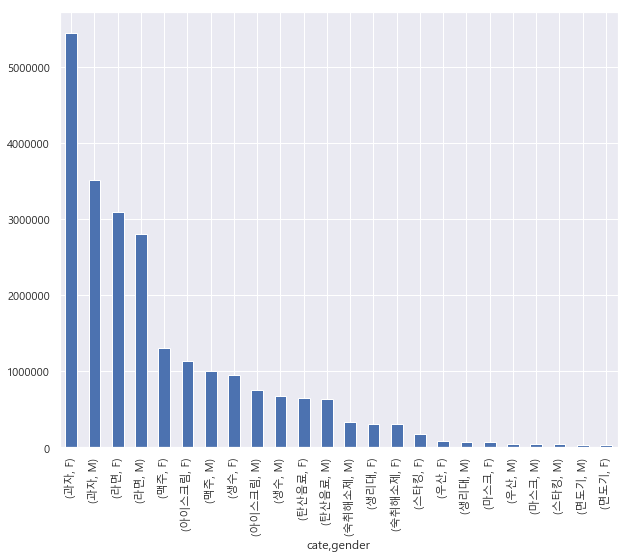

In [46]:
cvs_winter_16.quantity.groupby([cvs_winter_16.cate, cvs_winter_16.gender]).sum().sort_values(ascending=False).plot.bar(figsize=(10,8))

## ★ 여름과 겨울 라면&맥주 구매차이

In [47]:
cvs.head(2)

,region,sales_date,gender,age,cate,quantity,gu
0,서울특별시,20160101,F,00~19,라면,7,종로구
1,서울특별시,20160101,F,20~39,과자,655,종로구


In [48]:
cvs_summer_ra = cvs.loc[((cvs.sales_date>=20160701)&(cvs.sales_date<20160901))|((cvs.sales_date>=20170701)
                        &(cvs.sales_date<20170901))|((cvs.sales_date>=20180701)&(cvs.sales_date<20180901))]
print(cvs_summer_ra.shape)
print(cvs.shape)
cvs_summer_ra.head()

(473962, 7)
(2707786, 7)


,region,sales_date,gender,age,cate,quantity,gu
8947,서울특별시,20160701,F,00~19,과자,14,종로구
8948,서울특별시,20160701,F,00~19,라면,42,종로구
8949,서울특별시,20160701,F,00~19,생수,7,종로구
8950,서울특별시,20160701,F,00~19,우산,7,종로구
8951,서울특별시,20160701,F,20~39,과자,860,종로구


In [49]:
cvs_winter_ra = cvs.loc[((cvs.sales_date>=20160101)&(cvs.sales_date<20160301))|((cvs.sales_date>=20161101)
                        &(cvs.sales_date<20170301))|((cvs.sales_date>=20171101)&(cvs.sales_date<20180301))|
                       ((cvs.sales_date>=20181101)&(cvs.sales_date<20181231))]
print(cvs_winter_ra.shape)
print(cvs.shape)
cvs_winter_ra.head()

(842321, 7)
(2707786, 7)


,region,sales_date,gender,age,cate,quantity,gu
0,서울특별시,20160101,F,00~19,라면,7,종로구
1,서울특별시,20160101,F,20~39,과자,655,종로구
2,서울특별시,20160101,F,20~39,라면,282,종로구
3,서울특별시,20160101,F,20~39,마스크,35,종로구
4,서울특별시,20160101,F,20~39,맥주,183,종로구


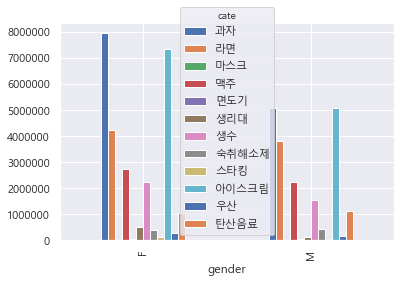

In [50]:
# 시각화
cvs_summer_ra['quantity'].groupby([cvs_summer_ra.gender, 
                                   cvs_summer_ra.cate]).sum().unstack().plot.bar()

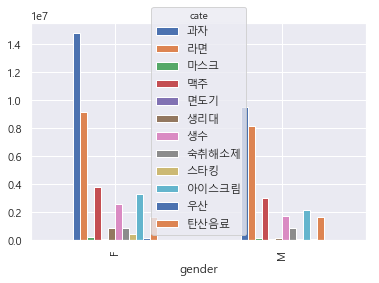

In [91]:
cvs_winter_ra['quantity'].groupby([cvs_winter_ra.gender, 
                                   cvs_winter_ra.cate]).sum().unstack().plot.bar()

In [51]:
cvs_summ = cvs_summer_ra['quantity'].groupby([cvs_summer_ra.gender, cvs_summer_ra.cate=='라면']).sum().unstack()

In [52]:
cvs_summer_ra.head(2)

,region,sales_date,gender,age,cate,quantity,gu
8947,서울특별시,20160701,F,00~19,과자,14,종로구
8948,서울특별시,20160701,F,00~19,라면,42,종로구


# 맥주, 라면, 샐러드

# 맥주, 여성 구매 > 남성 구매, why?

In [11]:
cvs.head()

,region,sales_date,gender,age,cate,quantity,gu
0,서울특별시,20160101,F,00~19,라면,7,종로구
1,서울특별시,20160101,F,20~39,과자,655,종로구
2,서울특별시,20160101,F,20~39,라면,282,종로구
3,서울특별시,20160101,F,20~39,마스크,35,종로구
4,서울특별시,20160101,F,20~39,맥주,183,종로구


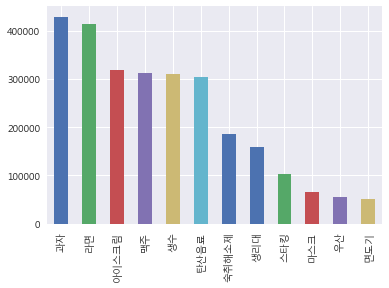

In [13]:
cvs.cate.value_counts().plot.bar()

In [14]:
cvs.head(2)

,region,sales_date,gender,age,cate,quantity,gu
0,서울특별시,20160101,F,00~19,라면,7,종로구
1,서울특별시,20160101,F,20~39,과자,655,종로구


In [23]:
cvs['cate']=='맥주'

0          False
1          False
2          False
3          False
4           True
5          False
6          False
7          False
8          False
9          False
10         False
11         False
12         False
13         False
14          True
15         False
16         False
17         False
18         False
19         False
20         False
21          True
22         False
23         False
24         False
25         False
26         False
27          True
28         False
29         False
           ...  
2707756    False
2707757    False
2707758    False
2707759    False
2707760    False
2707761    False
2707762    False
2707763    False
2707764    False
2707765    False
2707766    False
2707767    False
2707768    False
2707769    False
2707770    False
2707771    False
2707772    False
2707773    False
2707774    False
2707775    False
2707776    False
2707777    False
2707778    False
2707779    False
2707780    False
2707781    False
2707782     True
2707783    Fal

In [22]:
cvs['quantity'].groupby([cvs['cate']=='맥주', cvs['gender'], cvs['age']]).sum().to_frame()

quantity
cate  gender age            
False F      00~19   4090252
             20~39  80877943
             40~59  34096800
             60~99   3036883
      M      00~19   3174460
             20~39  55870778
             40~59  27174994
             60~99   1995877
True  F      00~19    228522
             20~39   8760518
             40~59   4121996
             60~99    379959
      M      00~19    169547
             20~39   6503312
             40~59   3875471
             60~99    299564

1) 3년간 편의점 맥주 구매한 20~39세 여성 8760518, 20~39세 남성 6503312  
2) 전 연령대에서 여성 구매자가 남성 구매자보다 많음  
3) 20~39세가 남녀불문하고 제일 많이 구매함

http://www.viva100.com/main/view.php?key=20190704010001727

In [ ]:
여름에 

In [ ]:
cvs.

In [24]:
hnb.head(2)

,region,gu,sales_date,gender,age,cate,quantity
0,서울특별시,종로구,20160101,F,20~39,립컬러,73
1,서울특별시,종로구,20160101,F,20~39,립케어,219


# 라면 구매 비율

In [93]:
cvs.head()

,region,sales_date,gender,age,cate,quantity,gu
0,서울특별시,20160101,F,00~19,라면,7,종로구
1,서울특별시,20160101,F,20~39,과자,655,종로구
2,서울특별시,20160101,F,20~39,라면,282,종로구
3,서울특별시,20160101,F,20~39,마스크,35,종로구
4,서울특별시,20160101,F,20~39,맥주,183,종로구


In [116]:
cvs.age.value_counts()

20~39    1118350
40~59     924433
00~19     389610
60~99     275393
Name: age, dtype: int64

In [108]:
cvs_seoul = cvs.loc[cvs['region']=='서울특별시']
cvs_seoul.shape

(1241047, 7)

In [117]:
print('서울 편의점에서 미성년 여성은 라면을 얼마나 구매했을까?', cvs_seoul.loc[(cvs_seoul['gender']=='F')&
                                                        (cvs_seoul['cate']=='라면')&(cvs_seoul['age']=='00~19'), ['quantity']].sum())
print('서울 편의점에서 2030 여성은 라면을 얼마나 구매했을까?', cvs_seoul.loc[(cvs_seoul['gender']=='F')&
                                                        (cvs_seoul['cate']=='라면')&(cvs_seoul['age']=='20~39'), ['quantity']].sum())
print('서울 편의점에서 4050 여성은 라면을 얼마나 구매했을까?', cvs_seoul.loc[(cvs_seoul['gender']=='F')&
                                                        (cvs_seoul['cate']=='라면')&(cvs_seoul['age']=='40~59'), ['quantity']].sum())
print('서울 편의점에서 60대 이상 여성은 라면을 얼마나 구매했을까?', cvs_seoul.loc[(cvs_seoul['gender']=='F')&
                                                        (cvs_seoul['cate']=='라면')&(cvs_seoul['age']=='60~99'), ['quantity']].sum())

서울 편의점에서 미성년 여성은 라면을 얼마나 구매했을까? quantity    543348
dtype: int64
서울 편의점에서 2030 여성은 라면을 얼마나 구매했을까? quantity    9502470
dtype: int64
서울 편의점에서 4050 여성은 라면을 얼마나 구매했을까? quantity    2986297
dtype: int64
서울 편의점에서 60대 이상 여성은 라면을 얼마나 구매했을까? quantity    290486
dtype: int64


In [118]:
print('서울 편의점을 이용한 미성년 여성은 전 품목을 얼마나 구매했을까?', cvs_seoul.loc[(cvs_seoul['gender']=='F')&
                                                            (cvs_seoul['age']=='00~19'), 'quantity'].sum())
print('서울 편의점을 이용한 2030 여성은 전 품목을 얼마나 구매했을까?', cvs_seoul.loc[(cvs_seoul['gender']=='F')&
                                                            (cvs_seoul['age']=='20~39'), 'quantity'].sum())
print('서울 편의점을 이용한 4050 여성은 전 품목을 얼마나 구매했을까?', cvs_seoul.loc[(cvs_seoul['gender']=='F')&
                                                            (cvs_seoul['age']=='40~59'), 'quantity'].sum())
print('서울 편의점을 이용한 60대 이상 여성은 전 품목을 얼마나 구매했을까?', cvs_seoul.loc[(cvs_seoul['gender']=='F')&
                                                            (cvs_seoul['age']=='60~99'), 'quantity'].sum())

서울 편의점을 이용한 미성년 여성은 전 품목을 얼마나 구매했을까? 2056263
서울 편의점을 이용한 2030 여성은 전 품목을 얼마나 구매했을까? 51514214
서울 편의점을 이용한 4050 여성은 전 품목을 얼마나 구매했을까? 17832420
서울 편의점을 이용한 60대 이상 여성은 전 품목을 얼마나 구매했을까? 1820877


In [127]:
print('서울 GS 편의점을 이용한 미성년 여성이 구매한 라면 비율', np.round(543348/2056263, 2)*100)
print('서울 GS 편의점을 이용한 2030 여성이 구매한 라면 비율', np.round(9502470/51514214, 2)*100)
print('서울 GS 편의점을 이용한 4050 여성이 구매한 라면 비율', np.round(2986297/17832420, 2)*100)
print('서울 GS 편의점을 이용한 60대 이상 여성이 구매한 라면 비율', np.round(290486/1820877, 2)*100)

서울 GS 편의점을 이용한 미성년 여성이 구매한 라면 비율 26.0
서울 GS 편의점을 이용한 2030 여성이 구매한 라면 비율 18.0
서울 GS 편의점을 이용한 4050 여성이 구매한 라면 비율 17.0
서울 GS 편의점을 이용한 60대 이상 여성이 구매한 라면 비율 16.0


# 맥주

In [123]:
cvs_beer = cvs.loc[(cvs.region=='서울특별시')&(cvs.cate=='맥주'), ['region', 'cate', 'quantity', 'gu']]

beer_seoul = cvs_beer.groupby([cvs_beer.gu], as_index=False).sum()
beer_seoul.sort_values(by='quantity', ascending=False)

geo_path = 'C:/Users/seob6/Desktop/DT/maru/skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))
map = folium.Map(location=[37.5502, 126.982], zoom_start=11)

map.choropleth(geo_data=geo_str, data=beer_seoul, 
               columns=['gu', 'quantity'], 
               fill_color='PuRd', key_on='feature.id')
map

In [124]:
beer_seoul

,gu,quantity
0,강남구,1089096
1,강동구,389622
2,강북구,233119
3,강서구,533930
4,관악구,1072368
5,광진구,443285
6,구로구,465833
7,금천구,171581
8,노원구,762694
9,도봉구,325886


In [125]:
print('서울 편의점에서 미성년 여성은 맥주를 얼마나 구매했을까?', cvs_seoul.loc[(cvs_seoul['gender']=='F')&
                                                        (cvs_seoul['cate']=='맥주')&(cvs_seoul['age']=='00~19'), ['quantity']].sum())
print('서울 편의점에서 2030 여성은 맥주를 얼마나 구매했을까?', cvs_seoul.loc[(cvs_seoul['gender']=='F')&
                                                        (cvs_seoul['cate']=='맥주')&(cvs_seoul['age']=='20~39'), ['quantity']].sum())
print('서울 편의점에서 4050 여성은 맥주를 얼마나 구매했을까?', cvs_seoul.loc[(cvs_seoul['gender']=='F')&
                                                        (cvs_seoul['cate']=='맥주')&(cvs_seoul['age']=='40~59'), ['quantity']].sum())
print('서울 편의점에서 60대 이상 여성은 맥주를 얼마나 구매했을까?', cvs_seoul.loc[(cvs_seoul['gender']=='F')&
                                                        (cvs_seoul['cate']=='맥주')&(cvs_seoul['age']=='60~99'), ['quantity']].sum())

서울 편의점에서 미성년 여성은 맥주를 얼마나 구매했을까? quantity    96827
dtype: int64
서울 편의점에서 2030 여성은 맥주를 얼마나 구매했을까? quantity    4738531
dtype: int64
서울 편의점에서 4050 여성은 맥주를 얼마나 구매했을까? quantity    1893409
dtype: int64
서울 편의점에서 60대 이상 여성은 맥주를 얼마나 구매했을까? quantity    197306
dtype: int64


In [126]:
print('서울 편의점을 이용한 미성년 여성은 전 품목을 얼마나 구매했을까?', cvs_seoul.loc[(cvs_seoul['gender']=='F')&
                                                            (cvs_seoul['age']=='00~19'), 'quantity'].sum())
print('서울 편의점을 이용한 2030 여성은 전 품목을 얼마나 구매했을까?', cvs_seoul.loc[(cvs_seoul['gender']=='F')&
                                                            (cvs_seoul['age']=='20~39'), 'quantity'].sum())
print('서울 편의점을 이용한 4050 여성은 전 품목을 얼마나 구매했을까?', cvs_seoul.loc[(cvs_seoul['gender']=='F')&
                                                            (cvs_seoul['age']=='40~59'), 'quantity'].sum())
print('서울 편의점을 이용한 60대 이상 여성은 전 품목을 얼마나 구매했을까?', cvs_seoul.loc[(cvs_seoul['gender']=='F')&
                                                            (cvs_seoul['age']=='60~99'), 'quantity'].sum())

서울 편의점을 이용한 미성년 여성은 전 품목을 얼마나 구매했을까? 2056263
서울 편의점을 이용한 2030 여성은 전 품목을 얼마나 구매했을까? 51514214
서울 편의점을 이용한 4050 여성은 전 품목을 얼마나 구매했을까? 17832420
서울 편의점을 이용한 60대 이상 여성은 전 품목을 얼마나 구매했을까? 1820877


In [129]:
print('서울 GS 편의점을 이용한 미성년 여성이 구매한 맥주 비율', np.round(96827/2056263, 2)*100)
print('서울 GS 편의점을 이용한 2030 여성이 구매한 맥주 비율', np.round(4738531/51514214, 2)*100)
print('서울 GS 편의점을 이용한 4050 여성이 구매한 맥주 비율', np.round(1893409/17832420, 2)*100)
print('서울 GS 편의점을 이용한 60대 이상 여성이 구매한 맥주 비율', np.round(197306/1820877, 2)*100)

서울 GS 편의점을 이용한 미성년 여성이 구매한 맥주 비율 5.0
서울 GS 편의점을 이용한 2030 여성이 구매한 맥주 비율 9.0
서울 GS 편의점을 이용한 4050 여성이 구매한 맥주 비율 11.0
서울 GS 편의점을 이용한 60대 이상 여성이 구매한 맥주 비율 11.0


In [22]:
cvs.head()

,region,sales_date,gender,age,cate,quantity,gu
0,서울특별시,20160101,F,00~19,라면,7,종로구
1,서울특별시,20160101,F,20~39,과자,655,종로구
2,서울특별시,20160101,F,20~39,라면,282,종로구
3,서울특별시,20160101,F,20~39,마스크,35,종로구
4,서울특별시,20160101,F,20~39,맥주,183,종로구


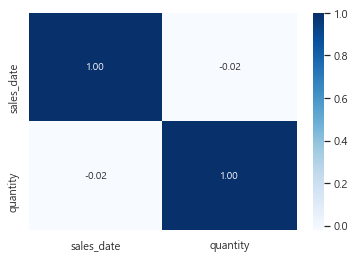

In [23]:
sns.heatmap(cvs.corr(), annot=True, fmt='.2f', cmap='Blues')

In [26]:
cvs.head(15)

,region,sales_date,gender,age,cate,quantity,gu
0,서울특별시,20160101,F,00~19,라면,7,종로구
1,서울특별시,20160101,F,20~39,과자,655,종로구
2,서울특별시,20160101,F,20~39,라면,282,종로구
3,서울특별시,20160101,F,20~39,마스크,35,종로구
4,서울특별시,20160101,F,20~39,맥주,183,종로구
5,서울특별시,20160101,F,20~39,생리대,78,종로구
6,서울특별시,20160101,F,20~39,생수,56,종로구
7,서울특별시,20160101,F,20~39,숙취해소제,14,종로구
8,서울특별시,20160101,F,20~39,스타킹,28,종로구
9,서울특별시,20160101,F,20~39,아이스크림,211,종로구


In [ ]:
(cvs['gender']=='F')&(cvs['cate']=='라면')&()

In [25]:
cvs.gu.value_counts()

중구           86980
강남구          64949
서초구          62972
마포구          60956
성남시          60418
용인시          58936
관악구          58618
수원시          56704
고양시          55080
영등포구         54813
서대문구         54799
부천시          54732
종로구          54295
송파구          54172
노원구          54137
안양시          53657
오산시안성시평택시    53122
양천구          50069
동작구          49954
화성시          49366
성북구          48723
구로구          48012
안산시          47320
강서구          47116
남양주시         47098
용산구          46615
광진구          46276
시흥시          46023
파주시          45880
미추홀구         45755
강동구          45299
은평구          43614
광주시          43460
성동구          43154
중랑구          43088
동대문구         42900
남동구          42627
의정부시         42367
군포시          41567
부평구          41078
서구           40004
연천군포천군       39598
광명시          38970
도봉구          38631
금천구          38512
가평군양평군       38079
여주시이천시       38012
연수구          37930
강북구          37529
김포시          34759
계양구          33483
의왕시          31888
양주시         

In [27]:
cvs.cate.value_counts()

과자       428685
라면       413521
아이스크림    318908
맥주       313128
생수       310041
탄산음료     303774
숙취해소제    184866
생리대      158116
스타킹      103876
마스크       65748
우산        55153
면도기       51970
Name: cate, dtype: int64

In [ ]:
1.